# Titanic Competition from Kaggle

In [114]:
import pandas as pd

df = pd.read_csv("./datasets/titanic/train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [116]:
print(df.shape)
print('---'*30)
print(df.columns)
print('---'*30)
print(df.info())
print('---'*30)

(891, 11)
------------------------------------------------------------------------------------------
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [117]:
print(f"Name: { df['Name'].count() }")
print(f"Ticket: { df['Ticket'].count() }")
print(f"Cabin: { df['Cabin'].count() }")
print(f"Embarked: { df['Embarked'].count() }")

Name: 891
Ticket: 891
Cabin: 204
Embarked: 889


In [118]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [198]:
df1 = df.drop(columns=["Name", "Ticket", "Embarked"])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,Unknown
2,1,1,female,38.0,1,0,71.2833,C85
3,1,3,female,26.0,0,0,7.9250,Unknown
4,1,1,female,35.0,1,0,53.1000,C123
5,0,3,male,35.0,0,0,8.0500,Unknown


In [199]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
dtype: int64

In [200]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1['Cabin'] = df1['Cabin'].fillna('Unknown')
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
dtype: int64

In [201]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,Unknown
2,1,1,female,38.0,1,0,71.2833,C85
3,1,3,female,26.0,0,0,7.9250,Unknown
4,1,1,female,35.0,1,0,53.1000,C123
5,0,3,male,35.0,0,0,8.0500,Unknown


In [202]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Cabin'] = le.fit_transform(df1['Cabin'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,147
2,1,1,0,38.0,1,0,71.2833,81
3,1,3,0,26.0,0,0,7.9250,147
4,1,1,0,35.0,1,0,53.1000,55
5,0,3,1,35.0,0,0,8.0500,147


/home/chris27/miniconda3/envs/notebook/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/chris27/miniconda3/envs/notebook/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


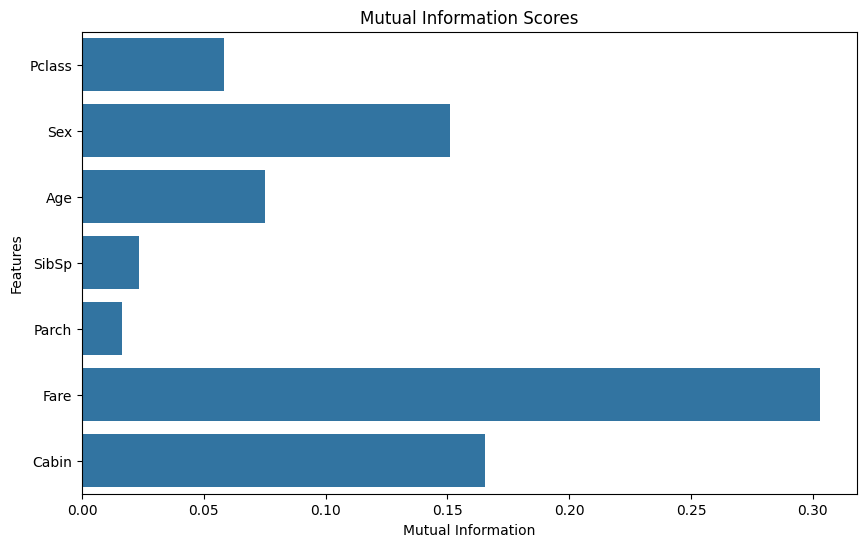

In [203]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns

X = df1.drop(columns=["Survived"])
y = df1["Survived"]
mi = mutual_info_classif(X, y, discrete_features=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi, y=X.columns)
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()

In [204]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df1['HasCabin'] = df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)
df1.drop(columns=['Cabin'], inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasCabin
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,1
5,0,3,1,35.0,0,0,8.0500,0


In [205]:
df1['FamilyMembers'] = df1['SibSp'] + df1['Parch']
df1.drop(columns=['SibSp', 'Parch'], inplace=True)
df1.head()


,Survived,Pclass,Sex,Age,Fare,HasCabin,FamilyMembers
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,0,1
2,1,1,0,38.0,71.2833,1,1
3,1,3,0,26.0,7.9250,0,0
4,1,1,0,35.0,53.1000,1,1
5,0,3,1,35.0,8.0500,0,0


In [206]:
df1['Sex_Pclass'] = df1['Sex'].astype(str) + '_' + df1['Pclass'].astype(str)
df1['Sex_Pclass'] = le.fit_transform(df1['Sex_Pclass'])
df1.drop(columns=['Sex', 'Pclass'], inplace=True)

/tmp/ipykernel_4975/3355043738.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1['Fare'], shade=True)


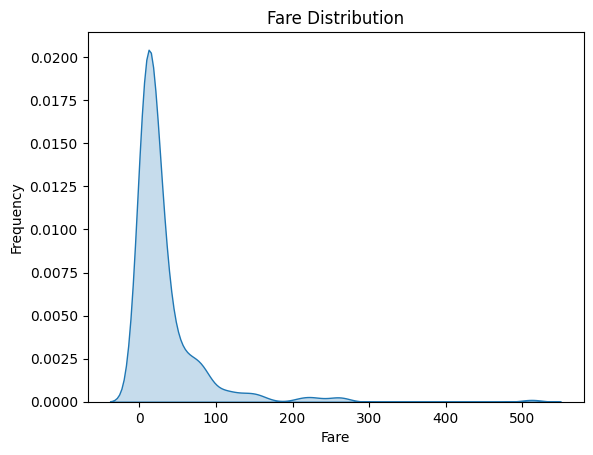

In [207]:
sns.kdeplot(data=df1['Fare'], shade=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_4975/243862877.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1['Fare'], shade=True)


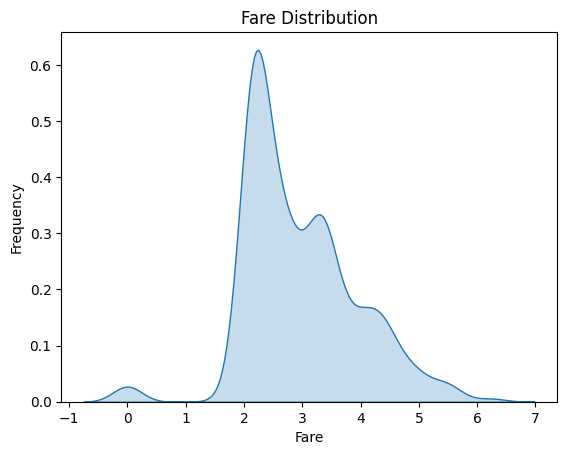

In [208]:
import numpy as np

df1['Fare'] = np.log1p(df['Fare'])

sns.kdeplot(data=df1['Fare'], shade=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_4975/2288610250.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1['Age'], shade=True)


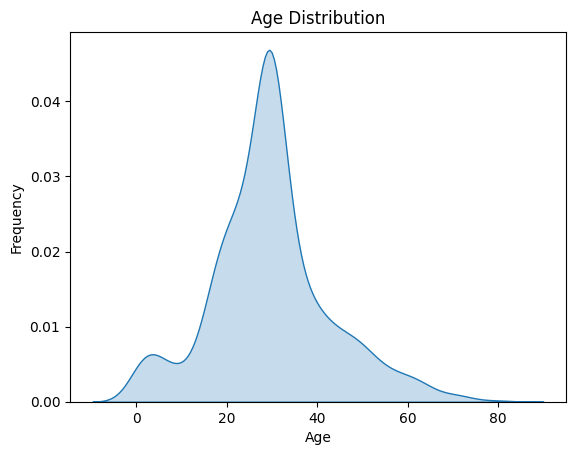

In [209]:
sns.kdeplot(data=df1['Age'], shade=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [210]:
# df1['Age'] = np.log1p(df1['Age'])

# sns.kdeplot(data=df1['Age'], shade=True)
# plt.title("Age Distribution")
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.show()

In [211]:
df1.head()

,Survived,Age,Fare,HasCabin,FamilyMembers,Sex_Pclass
PassengerId,,,,,,
1,0,22.0,2.110213,0,1,5
2,1,38.0,4.280593,1,1,0
3,1,26.0,2.188856,0,0,2
4,1,35.0,3.990834,1,1,0
5,0,35.0,2.202765,0,0,5


/home/chris27/miniconda3/envs/notebook/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/chris27/miniconda3/envs/notebook/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


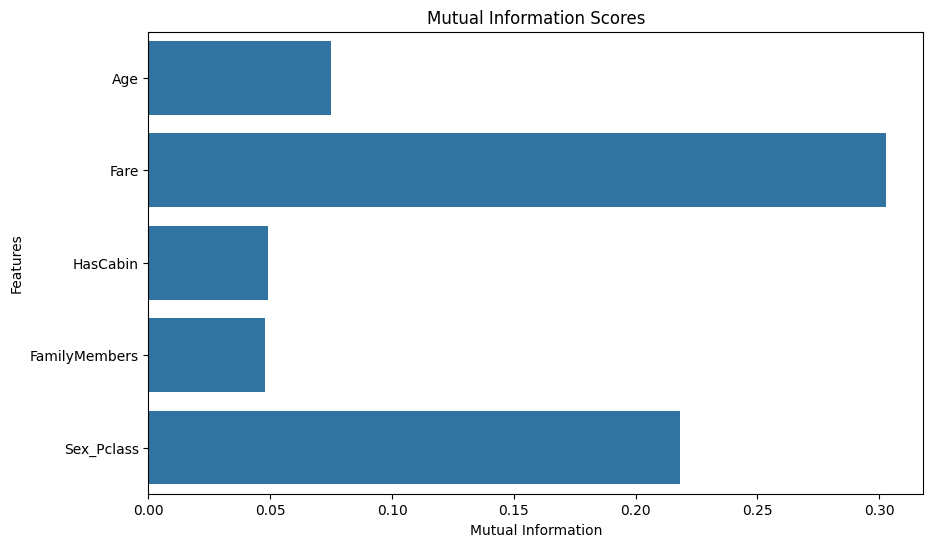

In [212]:
X = df1.drop(columns=["Survived"])
y = df1["Survived"]
mi = mutual_info_classif(X, y, discrete_features=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi, y=X.columns)
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()

In [213]:
print(X.shape)
X.head()

(891, 5)


,Age,Fare,HasCabin,FamilyMembers,Sex_Pclass
PassengerId,,,,,
1,22.0,2.110213,0,1,5
2,38.0,4.280593,1,1,0
3,26.0,2.188856,0,0,2
4,35.0,3.990834,1,1,0
5,35.0,2.202765,0,0,5


In [214]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    'max_depth': [3, 4, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.05, 0.2, 0.3]
}

search = RandomizedSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False),
                            param_distributions=params,
                            cv=5,
                            n_iter=30,
                            random_state=42)

search.fit(X_train, y_train)

[15:16:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:16:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_la

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...]}"
,n_iter,30
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [285]:
model = search.best_estimator_
y_pred = model.predict(X_test)

In [286]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[94 11]
 [23 51]]


In [287]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Average Accuracy:', scores.mean())

[15:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



Average Accuracy: 0.8114933149205952


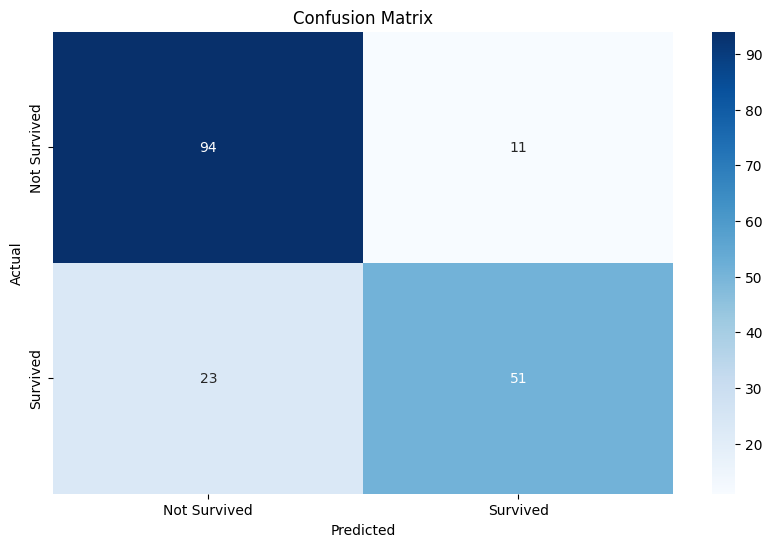

In [288]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [289]:
model.fit(X, y)

[15:19:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [290]:
test = pd.read_csv("./datasets/titanic/test.csv", index_col="PassengerId")
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [291]:
test.drop(columns=["Name", "Ticket", "Embarked"], inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN
893,3,female,47.0,1,0,7.0000,NaN
894,2,male,62.0,0,0,9.6875,NaN
895,3,male,27.0,0,0,8.6625,NaN
896,3,female,22.0,1,1,12.2875,NaN


In [292]:
test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,
1305,3,male,NaN,0,0,8.0500,NaN
1306,1,female,39.0,0,0,108.9000,C105
1307,3,male,38.5,0,0,7.2500,NaN
1308,3,male,NaN,0,0,8.0500,NaN
1309,3,male,NaN,1,1,22.3583,NaN


In [293]:
test.isnull().sum()

Pclass      0
Sex         0
Age        86
SibSp       0
Parch       0
Fare        1
Cabin     327
dtype: int64

In [294]:
test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin     327
dtype: int64

In [295]:
test['Cabin'] = test['Cabin'].fillna('Unknown')
test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Cabin     0
dtype: int64

In [296]:
test['HasCabin'] = test['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)
test['FamilyMembers'] = test['SibSp'] + test['Parch']
test.drop(columns=['Cabin', 'SibSp', 'Parch'], inplace=True)
test.head()

,Pclass,Sex,Age,Fare,HasCabin,FamilyMembers
PassengerId,,,,,,
892,3,male,34.5,7.8292,0,0
893,3,female,47.0,7.0000,0,1
894,2,male,62.0,9.6875,0,0
895,3,male,27.0,8.6625,0,0
896,3,female,22.0,12.2875,0,2


In [297]:
test["Sex"] = le.fit_transform(test["Sex"])
test['Sex_Pclass'] = test['Sex'].astype(str) + '_' + test['Pclass'].astype(str)
test['Sex_Pclass'] = le.fit_transform(test['Sex_Pclass'])
test.drop(columns=['Sex', 'Pclass'], inplace=True)
test.head()

,Age,Fare,HasCabin,FamilyMembers,Sex_Pclass
PassengerId,,,,,
892,34.5,7.8292,0,0,5
893,47.0,7.0000,0,1,2
894,62.0,9.6875,0,0,4
895,27.0,8.6625,0,0,5
896,22.0,12.2875,0,2,2


In [298]:
test['Fare'] = np.log1p(test['Fare'])
test['Age'] = np.log1p(test['Age'])
test.head()

,Age,Fare,HasCabin,FamilyMembers,Sex_Pclass
PassengerId,,,,,
892,3.569533,2.178064,0,0,5
893,3.871201,2.079442,0,1,2
894,4.143135,2.369075,0,0,4
895,3.332205,2.268252,0,0,5
896,3.135494,2.586824,0,2,2


In [299]:
predictions = model.predict(test)
predictions[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [300]:
submission = pd.DataFrame({
    'PassengerId': test.index,
    'Survived': predictions
})
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [301]:
submission.to_csv("./results/submission.csv", index=False)